# Housing Prices: Can you predict the home sales prices in Melbourne?

### Initialize

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load Data

In [2]:
dfMlb = pd.read_csv('house_prices.csv')
dfMlb.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,03/12/16,2.5,3067,...,1,1.0,202,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,04/02/16,2.5,3067,...,1,0.0,156,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,04/03/17,2.5,3067,...,2,0.0,134,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,04/03/17,2.5,3067,...,2,1.0,94,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,04/06/16,2.5,3067,...,1,2.0,120,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019


In [3]:
dfMlb.columns # Display all columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

### Clean Data

In [4]:
# Fill empty cells with the median from that column
median_year_built = math.floor(dfMlb.YearBuilt.median())
dfMlb.YearBuilt = dfMlb.YearBuilt.fillna(median_year_built)

In [5]:
median_car = math.floor(dfMlb.Car.median())
dfMlb.Car = dfMlb.Car.fillna(median_car)

In [6]:
median_building_area = math.floor(dfMlb.BuildingArea.median())
dfMlb.BuildingArea = dfMlb.BuildingArea.fillna(median_building_area)

In [7]:
# Drop remaining rows with empty cells
for column in dfMlb.columns:
    dfMlb = dfMlb[dfMlb[str(column)].notna()]
# Remove data where values are 0
dfMlb = dfMlb[dfMlb.Landsize != 0]
dfMlb = dfMlb[dfMlb.Price != 0]
# Get average price to calculate MAE in a future
avg_price = math.floor(dfMlb.Price.mean())

In [8]:
# Drop unique, redudant and useless columns
dfMlb = dfMlb.drop(columns=['Address', 'Date', 'Lattitude', 'Longtitude'])
# Rename misspelled columns inplace
dfMlb.rename(columns={'SellerG': 'Seller', 'Bedroom2': 'Bedroom', 'Regionname': 'RegionName', 'Propertycount': 'PropertyCount'}, inplace=True)

In [9]:
dfMlb.describe(include='all')

,Suburb,Rooms,Type,Price,Method,Seller,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,RegionName,PropertyCount
count,10272,10272.000000,10272,1.027200e+04,10272,10272,10272.000000,10272.000000,10272.000000,10272.000000,10272.000000,10272.000000,10272.000000,10272.000000,10272,10272,10272.000000
unique,305,NaN,3,NaN,5,237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,8,NaN
top,Reservoir,NaN,h,NaN,S,Nelson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Moreland,Southern Metropolitan,NaN
freq,301,NaN,8033,NaN,7017,1239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1030,3303,NaN
mean,NaN,3.068536,NaN,1.142861e+06,NaN,NaN,10.402434,3102.092971,3.038162,1.570678,1.659073,647.930199,141.715375,1965.026967,NaN,NaN,7304.301889
std,NaN,0.899147,NaN,6.493972e+05,NaN,NaN,5.578720,91.127321,0.916483,0.707189,0.985341,4548.807775,101.695480,30.162665,NaN,NaN,4392.989470
min,NaN,1.000000,NaN,1.310000e+05,NaN,NaN,0.000000,3000.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1196.000000,NaN,NaN,249.000000
25%,NaN,3.000000,NaN,7.100000e+05,NaN,NaN,6.700000,3044.000000,2.000000,1.000000,1.000000,258.000000,126.000000,1960.000000,NaN,NaN,4019.000000
50%,NaN,3.000000,NaN,9.675000e+05,NaN,NaN,9.850000,3081.000000,3.000000,1.000000,2.000000,516.000000,126.000000,1970.000000,NaN,NaN,6482.000000
75%,NaN,4.000000,NaN,1.400000e+06,NaN,NaN,13.000000,3146.000000,4.000000,2.000000,2.000000,670.000000,137.000000,1970.000000,NaN,NaN,9704.000000


In [10]:
# Check if we have succesfully removed all null vars
dfMlb.isnull().sum()

Suburb           0
Rooms            0
Type             0
Price            0
Method           0
Seller           0
Distance         0
Postcode         0
Bedroom          0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
RegionName       0
PropertyCount    0
dtype: int64

In [11]:
# Transform numerical values that are categorical to object type
dfMlb['YearBuilt'] = dfMlb['YearBuilt'].astype('object',copy=False)
dfMlb['Postcode'] = dfMlb['Postcode'].astype('object',copy=False)
# Encode categorical variables (to numerical)
from sklearn import model_selection, preprocessing
for col in dfMlb.columns:
    if dfMlb[col].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(dfMlb[col].values)) 
        dfMlb[col] = lbl.transform(list(dfMlb[col].values))

In [12]:
dfMlb.dtypes

Suburb             int64
Rooms              int64
Type               int64
Price              int64
Method             int64
Seller             int64
Distance         float64
Postcode           int64
Bedroom            int64
Bathroom           int64
Car              float64
Landsize           int64
BuildingArea     float64
YearBuilt          int64
CouncilArea        int64
RegionName         int64
PropertyCount      int64
dtype: object

### Feature Engineering

Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

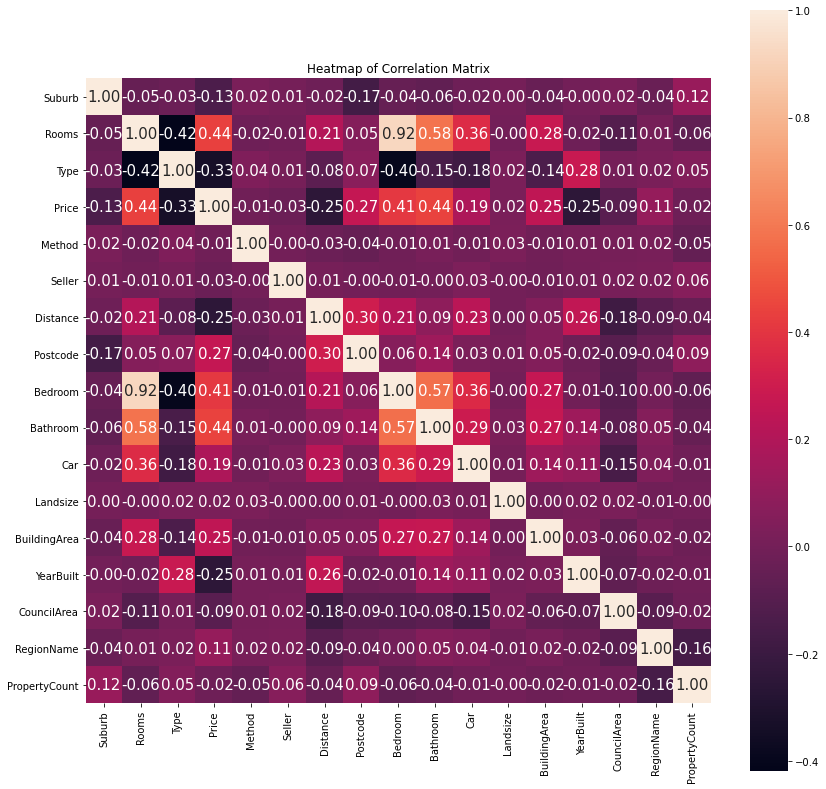

In [13]:
import matplotlib as mpl
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

corr = dfMlb.corr()
corr = (corr)
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws= {'size': 15}, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix')

### Select Data

In [14]:
# Select a Prediction Target
y = dfMlb.loc[:,['Price']]

In [15]:
y.head()

,Price
0,1480000
1,1035000
2,1465000
3,850000
4,1600000


In [16]:
# Selected Set of Features
x = dfMlb.loc[:, ['Suburb', 'Rooms', 'Type', 'Method', 'Seller', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'RegionName', 'PropertyCount']]

In [17]:
x.describe()

,Suburb,Rooms,Type,Method,Seller,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,RegionName,PropertyCount
count,10272.000000,10272.000000,10272.000000,10272.000000,10272.000000,10272.000000,10272.000000,10272.000000,10272.000000,10272.000000,10272.000000,10272.000000,10272.000000,10272.000000,10272.000000
mean,149.215343,3.068536,0.347741,1.362344,115.884930,10.402434,72.466803,1.570678,1.659073,647.930199,141.715375,89.670463,14.209502,3.743477,7304.301889
std,88.614796,0.899147,0.697428,1.077439,69.122205,5.578720,47.399684,0.707189,0.985341,4548.807775,101.695480,27.966337,9.796792,2.062906,4392.989470
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,249.000000
25%,61.000000,3.000000,0.000000,1.000000,63.000000,6.700000,33.000000,1.000000,1.000000,258.000000,126.000000,84.000000,6.000000,2.000000,4019.000000
50%,150.000000,3.000000,0.000000,1.000000,121.000000,9.850000,63.000000,1.000000,2.000000,516.000000,126.000000,94.000000,15.000000,5.000000,6482.000000
75%,227.000000,4.000000,0.000000,1.000000,173.000000,13.000000,109.000000,2.000000,2.000000,670.000000,137.000000,94.000000,23.000000,5.000000,9704.000000
max,304.000000,10.000000,2.000000,4.000000,236.000000,47.400000,192.000000,8.000000,10.000000,433014.000000,6791.000000,142.000000,32.000000,7.000000,21650.000000


### Build Model
1. Define
2. Fit
3. Predict
4. Evaluate

In [18]:
# Define

from sklearn.tree import DecisionTreeRegressor
modelDtrMlb = DecisionTreeRegressor()

In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=1)

In [20]:
# Feature Scaling (Normalize IV)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [21]:
# Build decision tree model
from sklearn.metrics import mean_absolute_error

# define
mdlDtrMlbSpl = DecisionTreeRegressor(random_state=1)

# fit
mdlDtrMlbSpl.fit(x_train, y_train)

# predict
y_test_pred = mdlDtrMlbSpl.predict(x_test)

# evaluate
mae = mean_absolute_error(y_test, y_test_pred)
print('MAE (after train-test-split): ', round(mae,2))
print("Current mae is ", round(mae/avg_price*100,2), "%")

MAE (after train-test-split):  251205.52
Current mae is  21.98 %


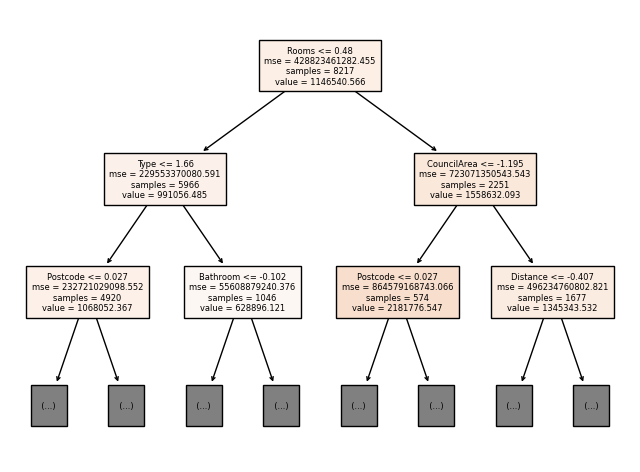

In [22]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6), dpi=100)
plot_tree(mdlDtrMlbSpl, max_depth=2, feature_names=x.columns, fontsize=6, filled=True)
plt.show()

### Improve Decision Tree model

In [23]:
# We will try to get our MAE down to 15%
# Function to tweak max_leaf_nodes parameter
def get_mae_lfndsDTR(X_trn, X_tst, y_trn, y_tst, mx_lf_nds):
    mdlDtrMlbDpt = DecisionTreeRegressor(random_state=1, max_leaf_nodes=mx_lf_nds)
    mdlDtrMlbDpt.fit(X_trn, y_trn)
    y_tst_prd = mdlDtrMlbDpt.predict(X_tst)
    mae = mean_absolute_error(y_test, y_tst_prd)
    return mae

# Funtion to tweak min_samples_leaf parameter
def get_mae_smplfsDTR(X_trn, X_tst, y_trn, y_tst, mn_spls_lf):
    mdlDtrMlbDpt = DecisionTreeRegressor(random_state=1, min_samples_leaf=mn_spls_lf)
    mdlDtrMlbDpt.fit(X_trn, y_trn)
    y_tst_prd = mdlDtrMlbDpt.predict(X_tst)
    mae = mean_absolute_error(y_test, y_tst_prd)
    return mae

# Funtion to tweak max_depth parameter
def get_mae_mxdpthDTR(X_trn, X_tst, y_trn, y_tst, mx_dpth):
    mdlDtrMlbDpt = DecisionTreeRegressor(random_state=1, max_depth=mx_dpth)
    mdlDtrMlbDpt.fit(X_trn, y_trn)
    y_tst_prd = mdlDtrMlbDpt.predict(X_tst)
    mae = mean_absolute_error(y_test, y_tst_prd)
    return mae

In [24]:
# For loops to get the ranges for the hyper parameter tunning
for i in [5, 50, 500, 5000, 50000]:
    mae = get_mae_lfndsDTR(x_train, x_test, y_train, y_test, i)
    print('Max leaf nodes: ', i, '\t MAE', round(mae, 2), '\t % MAE ', round(mae/avg_price*100,2))

for i in [5, 10]:
    mae = get_mae_smplfsDTR(x_train, x_test, y_train, y_test, i)
    print('Min samples per leaf: ', i, '\t MAE', round(mae, 2), '\t % MAE ', round(mae/avg_price*100,2))

for i in [5, 10, 15, 20]:
    mae = get_mae_mxdpthDTR(x_train, x_test, y_train, y_test, i)
    print('Max depth: ', i, '\t MAE', round(mae, 2), '\t % MAE ', round(mae/avg_price*100,2))

Max leaf nodes:  5 	 MAE 338975.62 	 % MAE  29.66
Max leaf nodes:  50 	 MAE 247512.97 	 % MAE  21.66
Max leaf nodes:  500 	 MAE 226680.59 	 % MAE  19.83
Max leaf nodes:  5000 	 MAE 249952.48 	 % MAE  21.87
Max leaf nodes:  50000 	 MAE 250348.93 	 % MAE  21.91
Min samples per leaf:  5 	 MAE 217297.08 	 % MAE  19.01
Min samples per leaf:  10 	 MAE 214211.42 	 % MAE  18.74
Max depth:  5 	 MAE 254204.12 	 % MAE  22.24
Max depth:  10 	 MAE 219378.22 	 % MAE  19.2
Max depth:  15 	 MAE 243619.52 	 % MAE  21.32
Max depth:  20 	 MAE 248162.38 	 % MAE  21.71


### Hyperparameter tuning for Decision Tree Regressor

In [25]:
mdlDtrMlbSpl.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 1,
 'splitter': 'best'}

In [34]:
# Import modules for Hyperparameter Tuning
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

# The function to measure the quality of a split
criterion = ['mse', 'friedman_mse', 'mae']
# The strategy used to choose the split at each node
splitter = ['best', 'random']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 100, num = 2)] + [None]
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in range(1, 10)] + [None]

# Setup the parameters and distribution to sample from: param_dist
param_dist = {
    "criterion": criterion,
    "splitter": splitter,
    "max_depth": max_depth,
    "min_samples_leaf": min_samples_leaf
}

# define
mdlDtrMlbDpt = DecisionTreeRegressor(random_state=1)

# Hyper parameter tune
mdlDtrMlbDptCV = RandomizedSearchCV(estimator = mdlDtrMlbDpt, param_distributions = param_dist, cv = 5)

# fit
mdlDtrMlbDptCV.fit(x_train, y_train)

# print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(mdlDtrMlbDptCV.best_params_))
print("Best score is {}", format(mdlDtrMlbDptCV.best_score_))

Tuned Decision Tree Parameters: {'splitter': 'best', 'min_samples_leaf': 6, 'max_depth': 100, 'criterion': 'friedman_mse'}
Best score is {} 0.6790782947690633


In [35]:
# Predicting the test set results
y_test_pred = mdlDtrMlbDptCV.predict(x_test)

# evaluate
mae = mean_absolute_error(y_test, y_test_pred)
print('MAE (after train-test-split): ', round(mae,2))
print("Current mae is ", round(mae/avg_price*100,2), "%")

MAE (after train-test-split):  217003.2
Current mae is  18.99 %


### Build Random Forest Model

In [28]:
from sklearn.ensemble import RandomForestRegressor

# define
mdlRfsMlb = RandomForestRegressor(random_state=1)

# fit
mdlRfsMlb.fit(x_train, y_train)

# predict
y_test_pred = mdlRfsMlb.predict(x_test)

# evaluate
mae = mean_absolute_error(y_test, y_test_pred)

print('MAE (Random Forest):', round(mae,2))
print("Current mae is ", round(mae/avg_price*100,2), "%")

MAE (Random Forest): 179177.72
Current mae is  15.68 %


### Improve Random Forest model

In [29]:
# Function to tweak max_leaf_nodes parameter
def get_mae_lfndsRFR(X_trn, X_tst, y_trn, y_tst, mx_lf_nds):
    mdlRfsMlb = RandomForestRegressor(random_state=1, max_leaf_nodes=mx_lf_nds)
    mdlRfsMlb.fit(X_trn, y_trn)
    y_tst_prd = mdlRfsMlb.predict(X_tst)
    mae = mean_absolute_error(y_test, y_tst_prd)
    return mae

# Funtion to tweak min_samples_leaf parameter
def get_mae_smplfsRFR(X_trn, X_tst, y_trn, y_tst, mn_spls_lf):
    mdlRfsMlb = RandomForestRegressor(random_state=1, min_samples_leaf=mn_spls_lf)
    mdlRfsMlb.fit(X_trn, y_trn)
    y_tst_prd = mdlRfsMlb.predict(X_tst)
    mae = mean_absolute_error(y_test, y_tst_prd)
    return mae

# Funtion to tweak min_samples_leaf parameter
def get_mae_dpthRFR(X_trn, X_tst, y_trn, y_tst, mx_dpth):
    mdlRfsMlb = RandomForestRegressor(random_state=1, max_depth=mx_dpth)
    mdlRfsMlb.fit(X_trn, y_trn)
    y_tst_prd = mdlRfsMlb.predict(X_tst)
    mae = mean_absolute_error(y_test, y_tst_prd)
    return mae

In [30]:
# Develop similar for loops for the new model
for i in [5, 50, 500, 5000, 50000]:
    mae = get_mae_lfndsRFR(x_train, x_test, y_train, y_test, i)
    print('Max leaf nodes: ', i, '\t MAE', round(mae, 2), '\t % MAE ', round(mae/avg_price*100,2))

for i in [5, 10, 15, 20, 25, 30]:
    mae = get_mae_smplfsRFR(x_train, x_test, y_train, y_test, i)
    print('Min samples per leaf: ', i, '\t MAE', round(mae, 2), '\t % MAE ', round(mae/avg_price*100,2))
    
for i in [5, 10, 15, 20]:
    mae = get_mae_dpthRFR(x_train, x_test, y_train, y_test, i)
    print('Max depth: ', i, '\t MAE', round(mae, 2), '\t % MAE ', round(mae/avg_price*100,2))
    

Max leaf nodes:  5 	 MAE 319839.35 	 % MAE  27.99
Max leaf nodes:  50 	 MAE 215124.33 	 % MAE  18.82
Max leaf nodes:  500 	 MAE 184240.52 	 % MAE  16.12
Max leaf nodes:  5000 	 MAE 179938.83 	 % MAE  15.74
Max leaf nodes:  50000 	 MAE 179939.17 	 % MAE  15.74
Min samples per leaf:  5 	 MAE 176715.67 	 % MAE  15.46
Min samples per leaf:  10 	 MAE 180239.45 	 % MAE  15.77
Min samples per leaf:  15 	 MAE 183847.22 	 % MAE  16.09
Min samples per leaf:  20 	 MAE 188048.31 	 % MAE  16.45
Min samples per leaf:  25 	 MAE 192215.27 	 % MAE  16.82
Min samples per leaf:  30 	 MAE 194787.86 	 % MAE  17.04
Max depth:  5 	 MAE 231046.1 	 % MAE  20.22
Max depth:  10 	 MAE 186388.54 	 % MAE  16.31
Max depth:  15 	 MAE 178273.73 	 % MAE  15.6
Max depth:  20 	 MAE 179051.59 	 % MAE  15.67


### Hyperparameter tuning for Random Forest Regressor

In [31]:
mdlRfsMlb.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [32]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# np.linspace returns evenly spaced numbers over a specified interval.
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 50, num = 5)] + [None]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

mdlRfsMlb = RandomForestRegressor()
# Random search of parameters, across 100 different combinations with all available logical cores
mdlRfsMlbCV = RandomizedSearchCV(estimator = mdlRfsMlb, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
mdlRfsMlbCV.fit(x_train, y_train)

print("Tuned Decision Tree Parameters: {}".format(mdlRfsMlbCV.best_params_))
print("Best score is {}", format(mdlRfsMlbCV.best_score_))


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 19.6min finished


Tuned Decision Tree Parameters: {'n_estimators': 1400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 38, 'bootstrap': False}
Best score is {} 0.7907541719586694


In [33]:
# Predicting the test set results
y_test_pred = mdlRfsMlbCV.predict(x_test)

# evaluate
mae = mean_absolute_error(y_test, y_test_pred)
print('MAE (after train-test-split): ', round(mae,2))
print("Current mae is ", round(mae/avg_price*100,2), "%")

MAE (after train-test-split):  174183.14
Current mae is  15.24 %


### We did it! We developed a model with a 15.24% MAE

### Alejandro Gleason Méndez - ag77698